# Market Basket Analysis Parameters
##### This notebook containss the applying of the Apriori Algorithm on the Groceries Datasets (Available on kaggle or my portfolio: MarwaneData.com)

##### I used Two packages for comapre the performance and build my web applcation of  'Market Basket Analysis Parameters'
### This just The notebook there is the flask web application

<a href="marwaneData.com"> MarwaneData.com

In [1]:
# The needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Avoid Errors
try:
    import apyori
except:
    !pip install apyori

from apyori import apriori



In [2]:
#Reading the Groceries 

data = pd.read_csv('data.csv', header=None, delimiter=';')
data = data.rename(columns={0: 'Transactions'})
data.head(10)

,Transactions
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
5,"whole milk,butter,yogurt,rice,abrasive cleaner"
6,rolls/buns
7,"other vegetables,UHT-milk,rolls/buns,bottled b..."
8,pot plants
9,"whole milk,cereals"


In [3]:
#Information about our Data
data.info

<bound method DataFrame.info of                                            Transactions
0     citrus fruit,semi-finished bread,margarine,rea...
1                          tropical fruit,yogurt,coffee
2                                            whole milk
3           pip fruit,yogurt,cream cheese ,meat spreads
4     other vegetables,whole milk,condensed milk,lon...
...                                                 ...
9830  sausage,chicken,beef,hamburger meat,citrus fru...
9831                                  cooking chocolate
9832  chicken,citrus fruit,other vegetables,butter,y...
9833  semi-finished bread,bottled water,soda,bottled...
9834  chicken,tropical fruit,other vegetables,vinega...

[9835 rows x 1 columns]>

In [4]:
# size of our data
data.shape 

(9835, 1)

In [5]:
#Checking the null values
data.isna().sum()

Transactions    0
dtype: int64

In [6]:
#describe the data, as our data are small text or strings, we will not find the median, std ...
data.describe()

,Transactions
count,9835
unique,7011
top,canned beer
freq,260


In [7]:
# Our data is an object (strings)
data.dtypes

Transactions    object
dtype: object

In [8]:
#number of unique values
data.nunique()

Transactions    7011
dtype: int64

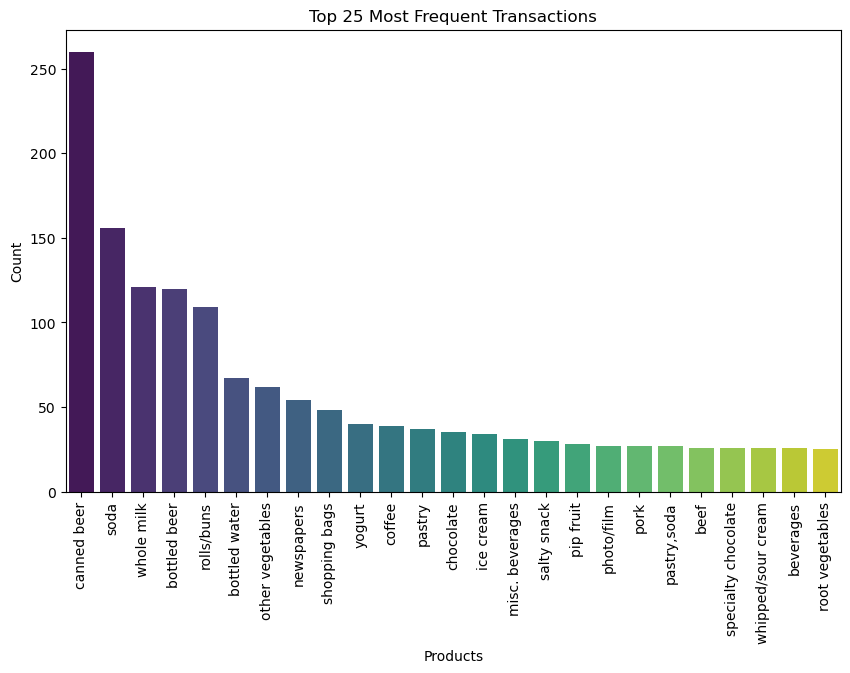

In [9]:
#Plot to see how many value we have
x = data['Transactions'].value_counts()
x = x.sort_values(ascending=False)
# You can change this depends on the number you want to see
# x = x[:you number]
x = x[:25]

plt.figure(figsize=(10, 6))
sns.barplot(x=x.index, y=x.values, palette='viridis')
plt.xlabel('Products')
plt.ylabel('Count')
plt.title('Top 25 Most Frequent Transactions')
plt.xticks(rotation=90)
plt.show()

In [10]:
# mlxtend which contains the apriori algorithm
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

oht = data['Transactions'].str.get_dummies(',')
oht = oht.astype(bool)

# Test some support values to find the number od associations for each support value
support_thresholds = [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.15, 0.2]

# Loop through the support thresholds and run Apriori for each
for support_threshold in support_thresholds:
    print(f"Support Threshold: {support_threshold * 100}%")

    # Run Apriori with the current support threshold
    frequent_itemsets = apriori(oht, min_support=support_threshold, use_colnames=True)
    # Print the number of frequent itemsets found
    num_frequent_itemsets = frequent_itemsets.shape[0]
    print(f"Number of Frequent Itemsets: {num_frequent_itemsets}")

    # If needed, you can also analyze and visualize the results here

    print("\n" + "="*40 + "\n")

Support Threshold: 1.0%
Number of Frequent Itemsets: 333


Support Threshold: 2.0%
Number of Frequent Itemsets: 122


Support Threshold: 5.0%
Number of Frequent Itemsets: 31


Support Threshold: 7.000000000000001%
Number of Frequent Itemsets: 19


Support Threshold: 9.0%
Number of Frequent Itemsets: 10


Support Threshold: 10.0%
Number of Frequent Itemsets: 8


Support Threshold: 15.0%
Number of Frequent Itemsets: 4


Support Threshold: 20.0%
Number of Frequent Itemsets: 1




In [11]:
# Use Apriori to find frequent item sets
frequent_itemsets = apriori(oht, min_support=0.021, use_colnames=True)

# Find association rules
association_rules_df = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
min_confidence = 0.4
min_lift = 1
min_length = 1

filtered_rules = association_rules_df[
    (association_rules_df['confidence'] >= min_confidence) &
    (association_rules_df['lift'] >= min_lift) &
    (association_rules_df['antecedents'].apply(lambda x: len(x)) >= min_length)
]

# Display the filtered association rules sorted by confidence
filtered_rules = filtered_rules.sort_values(by=['confidence'], ascending=False)
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
107,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340,0.524577
14,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,0.013395,1.480817,0.514659
22,(curd),(whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,0.012517,1.461085,0.505984
100,"(root vegetables, other vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,0.011076,1.457687,0.501524
101,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320,0.622230
27,(domestic eggs),(whole milk),0.063447,0.255516,0.029995,0.472756,1.850203,0.013783,1.412030,0.490649
96,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735,0.465077
80,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401,0.483202
44,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
32,(margarine),(whole milk),0.058566,0.255516,0.024199,0.413194,1.617098,0.009235,1.268706,0.405348


In [12]:
# In this part I want to test another package is: apyori

file_path = './data.csv'

# Initialize an empty list to store transactions
transactions = []

# Read the file and split lines into transactions
with open(file_path, 'r') as file:
    for line in file:
        items = line.strip().split(',')
        transactions.append(items)
transactions[0:10]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals']]

In [13]:
from apyori import apriori
import csv

# Define the minimum support, confidence, lift, and minimum length
min_support = 0.02
min_confidence = 0.4
min_lift = 1
min_length = 1

# Read the transaction data from the CSV file
transactions = []
with open('data.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        transactions.append(row)

# Convert the list of transactions into a list of lists
transactions = [list(transaction) for transaction in transactions]

# Perform Apriori analysis
association_rules = list(apriori(transactions, min_support=min_support, min_confidence=min_confidence, min_lift=min_lift, min_length=min_length))
# Print the association rules
for rule in association_rules:
    print("Rule:", list(rule.items), "->", list(rule.ordered_statistics[0].items_add))
    print("Support:", rule.support)
    print("Confidence:", rule.ordered_statistics[0].confidence)
    print("Lift:", rule.ordered_statistics[0].lift)
    print("=" * 50)

Rule: ['whole milk', 'beef'] -> ['whole milk']
Support: 0.02125063548551093
Confidence: 0.4050387596899225
Lift: 1.5851795469758803
Rule: ['butter', 'whole milk'] -> ['whole milk']
Support: 0.02755465175394001
Confidence: 0.4972477064220184
Lift: 1.9460530014566455
Rule: ['curd', 'whole milk'] -> ['whole milk']
Support: 0.026131164209456024
Confidence: 0.4904580152671756
Lift: 1.9194805332879712
Rule: ['whole milk', 'domestic eggs'] -> ['whole milk']
Support: 0.029994916115912557
Confidence: 0.47275641025641024
Lift: 1.8502026640954214
Rule: ['frozen vegetables', 'whole milk'] -> ['whole milk']
Support: 0.02043721403152008
Confidence: 0.4249471458773784
Lift: 1.6630939831691272
Rule: ['margarine', 'whole milk'] -> ['whole milk']
Support: 0.024199288256227757
Confidence: 0.4131944444444444
Lift: 1.6170980346641903
Rule: ['root vegetables', 'other vegetables'] -> ['other vegetables']
Support: 0.047381799694966954
Confidence: 0.43470149253731344
Lift: 2.2466049285887952
Rule: ['whipped/so

In [14]:
len(association_rules)

14

### The End
##### as you have been tested to two packages we get the same result but you will see some performance (time) diffrent between the two packges
